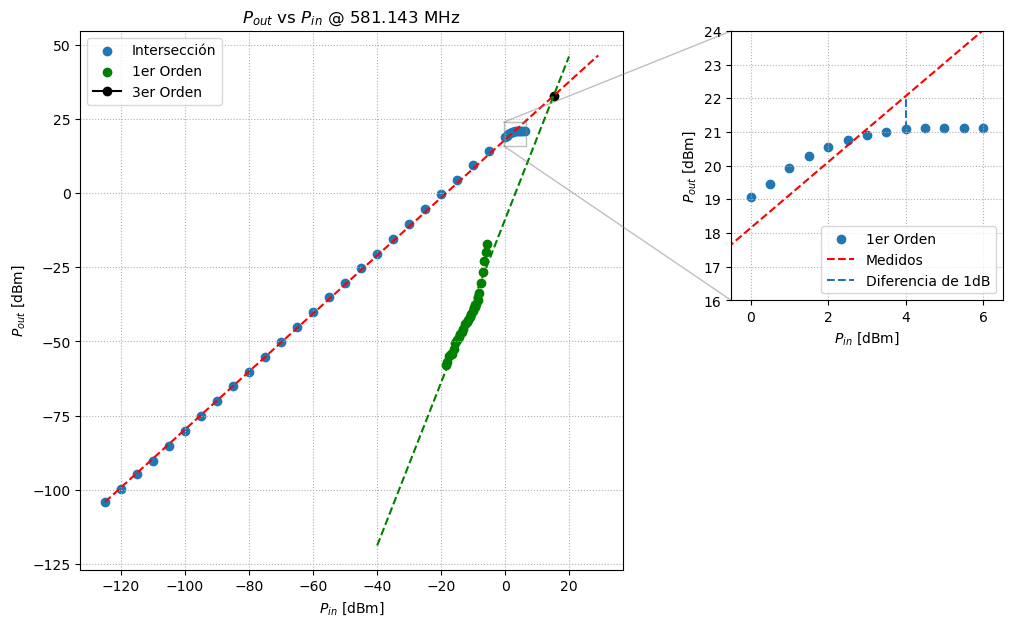

El punto de compresión de 1dB (IP1) a 581.143 MHz es 21.11[dBm]
El punto de Intercepción de 3er Orden (IP3) a 581.143 MHz es 32.91[dBm]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString

#Leo las muestras
path = 'LNA_Pot.npz'
with np.load(path) as data:
   Pin   = data['Pin']
   Pout  = data['Pout']
   Pin3  = data['Pin3']
   Pout3 = data['Pout3']

# Ajuste por mínimos cuadrados
m, b =  np.polyfit(Pin,Pout,1)
adj = np.poly1d([m,b])
adjx = np.arange(-125,30)
m3, b3 =  np.polyfit(Pin3,Pout3,1)
adj3 = np.poly1d([m3,b3])
adj3x = np.arange(-40,20,0.1)

# Intersección
l1 = LineString(np.column_stack((adjx,adj(adjx))))
l2 = LineString(np.column_stack((adj3x, adj3(adj3x))))
inter= (l1.intersection(l2)).xy
PI3  = inter[1][0]
P1db = Pout[Pin==4.5][0]

# Grafico de Potencias
im, ax = plt.subplots(1,1, figsize=(7,7))
ax.set_ylabel(r"$P_{out}$ [dBm]")
ax.set_xlabel(r"$P_{in}$ [dBm]")
ax.grid(True,linestyle='dotted')
ax.set_title(r"$P_{out}$ vs $P_{in}$ @ 581.143 MHz")
axins = ax.inset_axes([1.2,0.5,0.5,0.5],)
axins.set_xlim(-.5,6.5)
axins.set_ylim(16,24)
axins.grid(True,linestyle='dotted')
axins.set_ylabel(r"$P_{out}$ [dBm]")
axins.set_xlabel(r"$P_{in}$ [dBm]")
ax.scatter(Pin,Pout)
ax.scatter(Pin3,Pout3,color='green')
ax.plot(inter[0][0],PI3,marker='o',color='black')
ax.plot(adjx, adj(adjx),ls='--',color='red')
ax.plot(adj3x, adj3(adj3x),ls='--',color='green')
axins.scatter(Pin,Pout)
axins.plot(Pin, adj(Pin),ls='--',color='red')
axins.vlines(x=4,ymin=Pout[Pin==4],ymax=adj(4),ls='--')
ax.legend(["Intersección","1er Orden", "3er Orden"])
axins.legend(["1er Orden", "Medidos","Diferencia de 1dB"],loc='lower right')
ax.indicate_inset_zoom(axins)
plt.show()

# Muestro las salidas
print("El punto de compresión de 1dB (IP1) a 581.143 MHz es {:0.2f}[dBm]".format(P1db))
print("El punto de Intercepción de 3er Orden (IP3) a 581.143 MHz es {:0.2f}[dBm]".format(PI3))

im.savefig('caractLna.pdf',dpi=500)

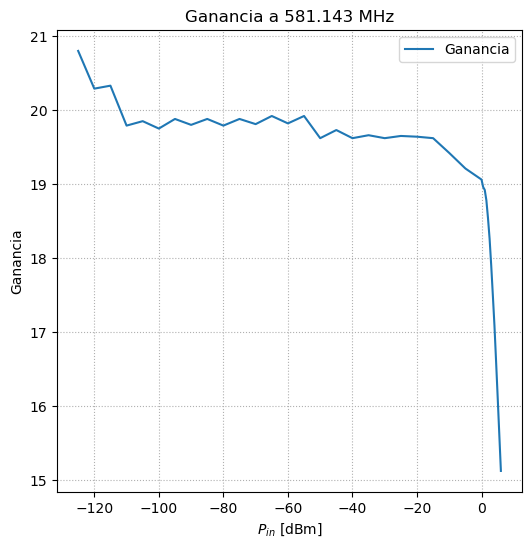

In [5]:
#@title Ganancia a 581 MHz
im, ax = plt.subplots(1,1, figsize=(6,6))
ax.set_ylabel(r"Ganancia")
ax.set_xlabel(r"$P_{in}$ [dBm]")
ax.grid(True,linestyle='dotted')
ax.set_title(r"Ganancia a 581.143 MHz")
ax.plot(Pin,(Pout-Pin))
ax.legend(["Ganancia"])
plt.show()#@title Parámetros S del LNA


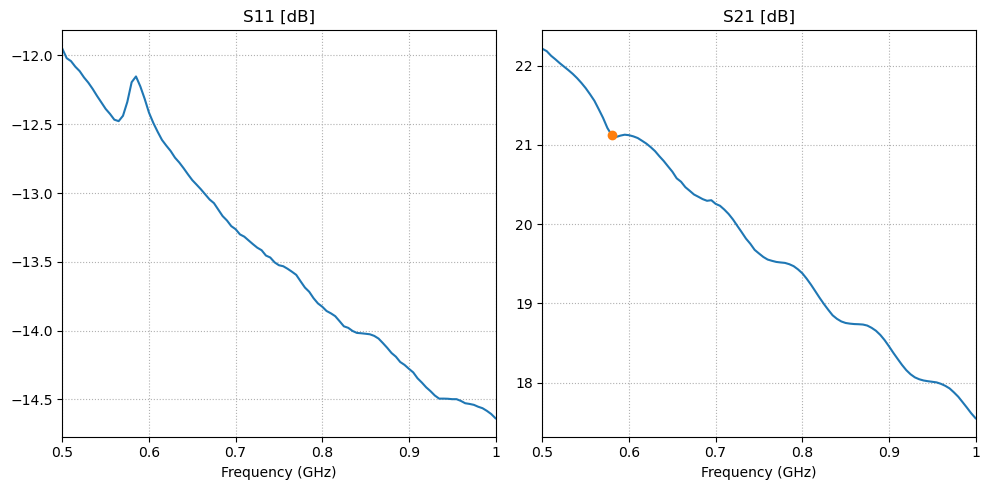

[21.12418171]


In [19]:
import skrf as rf
import numpy as np
import matplotlib.pyplot as plt

amp=rf.Network('LNA_S.s2p')

# Ganancia para f=580MHz
#G= 20*np.log10(np.abs(np.ndarray.flatten(amp.s[amp.f==5.8E8])[2]))

im1, ax = plt.subplots(1,2,figsize=(10,5))
amp['0-1ghz'].plot_s_db(m=0,n=0,ax=ax[0],title='S11 [dB]',show_legend=False)
amp['0-1ghz'].plot_s_db(m=1,n=0,ax=ax[1],title='S21 [dB]',show_legend=False)
amp.s21['581.143mhz'].plot_s_db(lw=1, ax=ax[1],marker='o',show_legend=False)
# amp.plot_s_db(m=0,n=1,ax=ax[1,0],title='S12 [dB]')
# amp.plot_s_db(m=1,n=1,ax=ax[1,1],title='S22 [dB]')
ax[0].grid(True,linestyle='dotted')
ax[1].grid(True,linestyle='dotted')
# ax[1,0].grid(True)
# ax[1,1].grid(True)
im1.tight_layout()
plt.show()

print(20*np.log10(np.abs(amp.s21['581mhz'].s.flatten())))
im1.savefig('sparamlna.pdf',dpi=300)